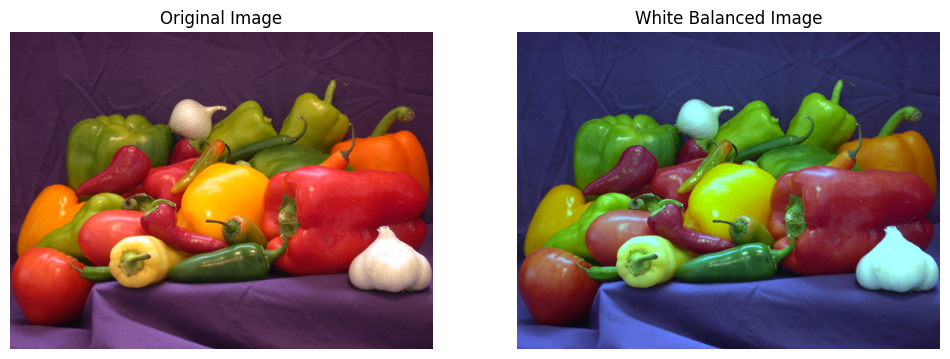

In [ ]:
#White Balancing using Gray World Assumption
import cv2
import numpy as np
import matplotlib.pyplot as plt

def white_balance_gray_world(img):
    """
    Apply white balancing using the Gray World assumption.
    """
    # Convert image to float for calculations
    result = img.copy().astype(np.float32)

    # Compute the average for each channel
    avg_b = np.mean(result[:, :, 0])
    avg_g = np.mean(result[:, :, 1])
    avg_r = np.mean(result[:, :, 2])

    # Compute the overall average
    avg_gray = (avg_b + avg_g + avg_r) / 3

    # Scale each channel based on the average
    result[:, :, 0] = result[:, :, 0] * (avg_gray / avg_b)
    result[:, :, 1] = result[:, :, 1] * (avg_gray / avg_g)
    result[:, :, 2] = result[:, :, 2] * (avg_gray / avg_r)

    # Clip values to be in valid range
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result

# Load the image
image = cv2.imread('/content/peppers.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Apply white balancing
balanced_image = white_balance_gray_world(image)

# Show original and balanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(balanced_image)
plt.title('White Balanced Image')
plt.axis('off')

plt.show()


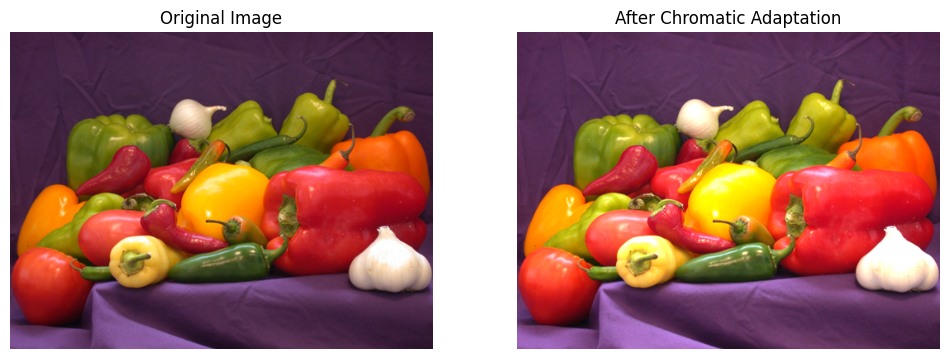

In [ ]:
#Chromatic Adaptation (Simple Von Kries Model)
import cv2
import numpy as np
import matplotlib.pyplot as plt

def chromatic_adaptation(img, source_white, target_white):
    """
    Apply simple chromatic adaptation using scaling factors (Von Kries model).

    Parameters:
        img: Input image as a numpy array
        source_white: Array-like [R, G, B] for the source white reference
        target_white: Array-like [R, G, B] for the target white reference
    """
    result = img.copy().astype(np.float32)

    # Compute scaling factors
    scale_r = target_white[0] / source_white[0]
    scale_g = target_white[1] / source_white[1]
    scale_b = target_white[2] / source_white[2]

    # Apply the scaling
    result[:, :, 0] = result[:, :, 0] * scale_b
    result[:, :, 1] = result[:, :, 1] * scale_g
    result[:, :, 2] = result[:, :, 2] * scale_r

    # Clip values to be in valid range
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result


image = cv2.imread('/content/peppers.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Example white points (could be estimated or predefined)
source_white = [200, 200, 200]  # Under warm light
target_white = [255, 255, 255]  # Standard daylight

# Apply chromatic adaptation
adapted_image = chromatic_adaptation(image, source_white, target_white)

# Show the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adapted_image)
plt.title('After Chromatic Adaptation')
plt.axis('off')

plt.show()


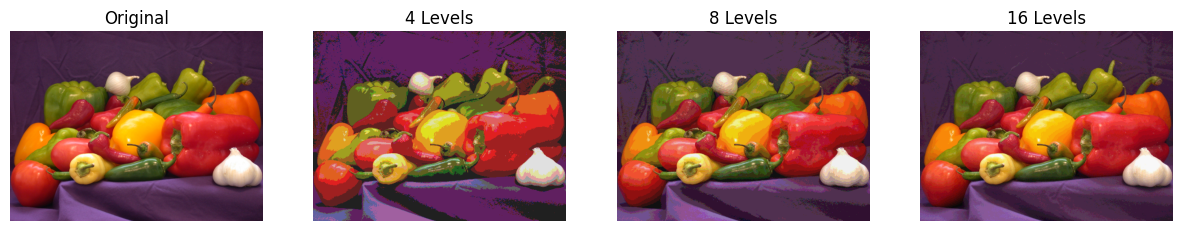

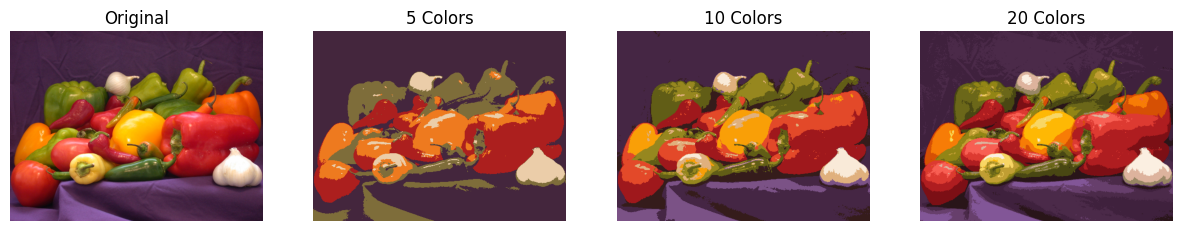

In [ ]:
#Image quantization
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (BGR to RGB for display)
img = cv2.imread('/content/peppers.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Function for uniform quantization
def uniform_quantization(image, levels):
    # levels: number of quantization levels per channel (e.g., 4, 8, 16)
    factor = 256 // levels
    quantized = (image // factor) * factor + factor // 2
    return quantized.astype(np.uint8)

# Apply quantization with different levels
q4 = uniform_quantization(img, 4)   # 4 levels per channel
q8 = uniform_quantization(img, 8)   # 8 levels per channel
q16 = uniform_quantization(img, 16) # 16 levels per channel

# Show results
fig, axs = plt.subplots(1, 4, figsize=(15,5))
axs[0].imshow(img); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(q4); axs[1].set_title("4 Levels"); axs[1].axis("off")
axs[2].imshow(q8); axs[2].set_title("8 Levels"); axs[2].axis("off")
axs[3].imshow(q16); axs[3].set_title("16 Levels"); axs[3].axis("off")
plt.show()

from sklearn.cluster import KMeans

def kmeans_quantization(image, k):
    # Reshape image to (num_pixels, 3)
    pixels = image.reshape(-1, 3)

    # Apply K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)

    # Replace pixel values with cluster centers
    new_colors = kmeans.cluster_centers_.astype(np.uint8)
    quantized = new_colors[labels].reshape(image.shape)

    return quantized

# Apply K-means with different numbers of colors
q5 = kmeans_quantization(img, 5)
q10 = kmeans_quantization(img, 10)
q20 = kmeans_quantization(img, 20)

# Show results
fig, axs = plt.subplots(1, 4, figsize=(15,5))
axs[0].imshow(img); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(q5); axs[1].set_title("5 Colors"); axs[1].axis("off")
axs[2].imshow(q10); axs[2].set_title("10 Colors"); axs[2].axis("off")
axs[3].imshow(q20); axs[3].set_title("20 Colors"); axs[3].axis("off")
plt.show()


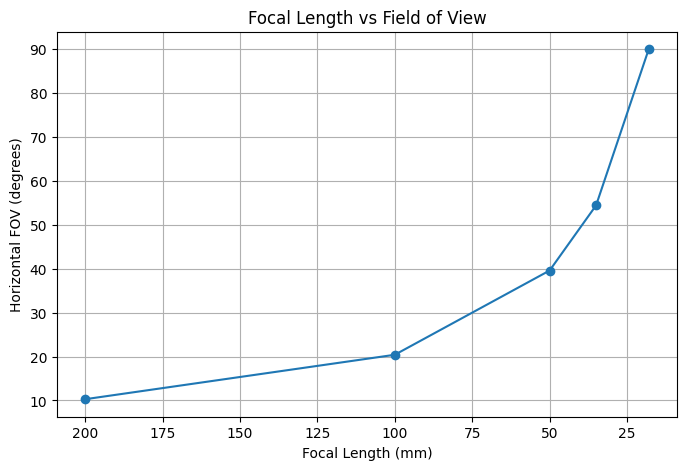

In [6]:
#Focal Length & Field of View (FOV)
import numpy as np
import matplotlib.pyplot as plt

def field_of_view(sensor_width, focal_length):
    """Compute horizontal FOV in degrees"""
    return 2 * np.degrees(np.arctan(sensor_width / (2 * focal_length)))

# Example: Full-frame sensor (36 mm width)
sensor_width = 36
focal_lengths = [18, 35, 50, 100, 200]

fovs = [field_of_view(sensor_width, f) for f in focal_lengths]

plt.figure(figsize=(8,5))
plt.plot(focal_lengths, fovs, marker='o')
plt.title("Focal Length vs Field of View")
plt.xlabel("Focal Length (mm)")
plt.ylabel("Horizontal FOV (degrees)")
plt.gca().invert_xaxis()  # Longer focal length = narrower FOV
plt.grid(True)
plt.show()


Near focus: 1.88 m, Far focus: 2.14 m, DOF: 0.26 m


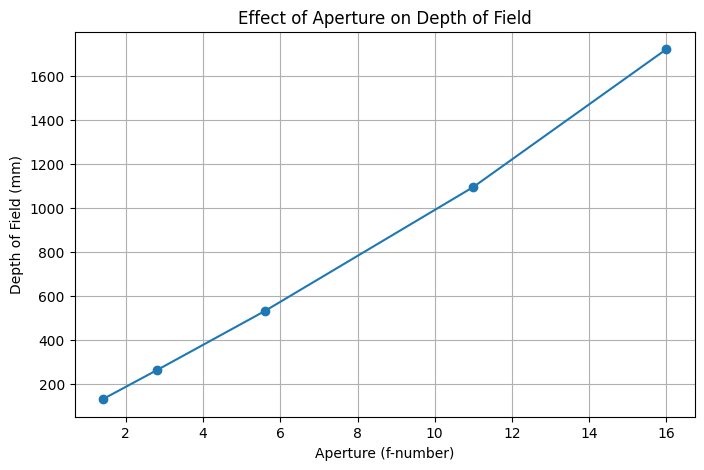

In [7]:
#Depth of Field (DOF)
def depth_of_field(f, N, c, d):
    """Compute near DOF, far DOF, and total DOF"""
    H = (f**2) / (N * c) + f  # Hyperfocal distance
    near = (H * d) / (H + (d - f))
    far = (H * d) / (H - (d - f)) if d < H else np.inf
    return near, far, far - near if far != np.inf else np.inf

# Example: 50mm lens, f/2.8, full-frame sensor
f = 50       # focal length (mm)
N = 2.8      # aperture (f-number)
c = 0.03     # CoC for full-frame
d = 2000     # subject distance (mm) = 2 m

near, far, dof = depth_of_field(f, N, c, d)
print(f"Near focus: {near/1000:.2f} m, Far focus: {far/1000:.2f} m, DOF: {dof/1000:.2f} m")


# Aperture Effect Visualization

apertures = [1.4, 2.8, 5.6, 11, 16]
dof_values = [depth_of_field(f, N, c, d)[2] for N in apertures]

plt.figure(figsize=(8,5))
plt.plot(apertures, dof_values, marker='o')
plt.title("Effect of Aperture on Depth of Field")
plt.xlabel("Aperture (f-number)")
plt.ylabel("Depth of Field (mm)")
plt.grid(True)
plt.show()